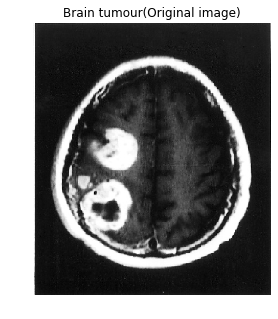

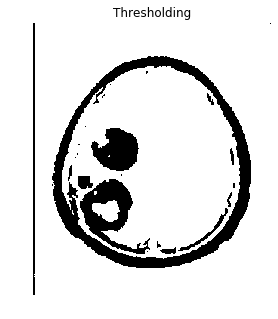

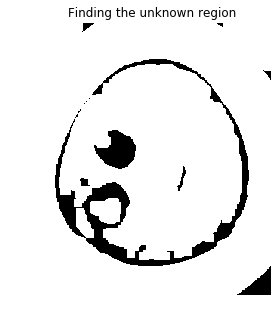

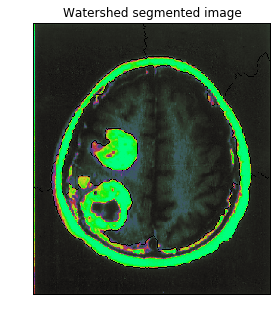

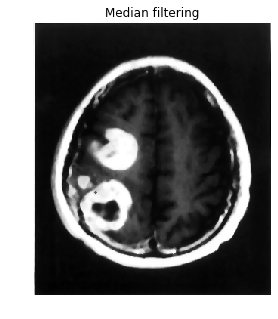

Sobel X = 
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Sobel Y = 
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


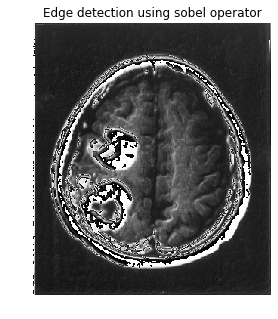

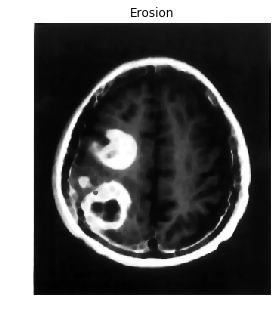

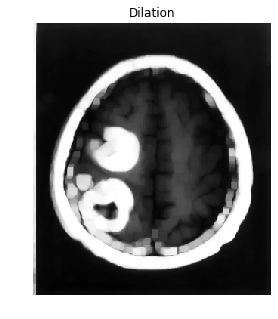

In [2]:
#Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def disp(title, img, ctype):
    plt.figure(figsize=(5,5))
    if(ctype=='bgr'):
        b,g,r = cv2.split(img)
        rgb_img = cv2.merge([r,g,b])
        plt.imshow(rgb_img)
    elif(ctype=='hsv'):
        rgb = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
        plt.imshow(rgb)
    elif(ctype=='gray'):
        plt.imshow(img, cmap='gray')
    elif(ctype=='rgb'):
        plt.imshow(img)
    else:
        raise Exception("Unknown colour type")
    plt.axis('off')
    plt.title(title)
    plt.show()
    
img = cv2.imread('DATA/brain5.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
disp('Brain tumour(Original image)', gray, 'gray')

ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#Threshold value=50, Max=255
disp('Thresholding', thresh, 'gray')

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
disp('Finding the unknown region', unknown, 'gray')

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

im1 = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
disp('Watershed segmented image',im1,'gray')

#Removal of salt and pepper noise using 5X5 median filter
median_filtered = cv2.medianBlur(gray, 5)
disp('Median filtering', median_filtered, 'gray')

#Edge detection using sobel operator
#3X3 sobel filters
SobelX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print("Sobel X = ")
print(SobelX)
SobelY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print("Sobel Y = ")
print(SobelY)
img_sobelx = cv2.Sobel(median_filtered, cv2.CV_8U, 1,0, ksize=3)
img_sobely = cv2.Sobel(median_filtered, cv2.CV_8U, 0, 1, ksize=3)

img_sobel = img_sobelx + img_sobely+gray
disp('Edge detection using sobel operator', img_sobel, 'gray')

#MORPHOLOGICAL OPERATIONS

#Erosion
morph = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
erosion = cv2.morphologyEx(median_filtered, cv2.MORPH_ERODE, kernel)
disp('Erosion', erosion, 'gray')

#Dilation
dilation = cv2.morphologyEx(erosion, cv2.MORPH_DILATE, morph)
disp('Dilation', dilation, 'gray')


